In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading data
file_path = Path("Superstore_merged_clean.csv")
Superstore = pd.read_csv(file_path)
Superstore.head()

,Row ID,Order ID,Order Date,Order Quantity,Sales,Discount,Profit,Unit Price,Customer Name,Country,Region,Customer Segment,Product Category,Product Sub-Category,Product Name
0,43,4132,5/28/2011,5,14.76,0.01,1.32,2.88,Aaron Bergman,CAN,Nunavut,Corporate,Office Supplies,Labels,Avery 49
1,8234,20513,7/7/2009,13,42.27,0.01,4.56,2.84,Aaron Bergman,CAN,West,Corporate,Office Supplies,Pens & Art Supplies,SANFORD Liquid Accent� Tank-Style Highlighters
2,8300,36262,7/27/2010,23,164.02,0.03,-47.64,6.68,Aaron Bergman,CAN,West,Corporate,Office Supplies,Paper,Xerox 1968
3,8301,36262,7/27/2010,23,136.81,0.01,-30.51,5.68,Aaron Bergman,CAN,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Acme� Preferred Stainless Steel Scissors
4,8302,36262,7/27/2010,26,4701.69,0.00,1148.90,205.99,Aaron Bergman,CAN,West,Corporate,Technology,Telephones and Communication,V70


In [3]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                18393 non-null  int64  
 1   Order ID              18393 non-null  object 
 2   Order Date            18393 non-null  object 
 3   Order Quantity        18393 non-null  int64  
 4   Sales                 18393 non-null  float64
 5   Discount              18393 non-null  float64
 6   Profit                18393 non-null  float64
 7   Unit Price            18393 non-null  float64
 8   Customer Name         18393 non-null  object 
 9   Country               18393 non-null  object 
 10  Region                18393 non-null  object 
 11  Customer Segment      18393 non-null  object 
 12  Product Category      18393 non-null  object 
 13  Product Sub-Category  18393 non-null  object 
 14  Product Name          18393 non-null  object 
dtypes: float64(4), int6

In [4]:
Superstore_agg = Superstore.groupby('Customer Name').sum()

Superstore_agg


,Row ID,Order Quantity,Sales,Discount,Profit,Unit Price
Customer Name,,,,,,
Aaron Bergman,100244,181,12516.7460,0.63,3155.1865,824.474
Aaron Hawkins,155507,424,29435.4255,1.68,6326.6252,1537.064
Aaron Smayling,124661,351,11886.0155,4.15,1860.8254,1459.530
Adam Bellavance,225496,389,19333.2000,1.34,1872.6485,2345.278
Adam Hart,355455,581,29364.6015,4.17,4353.0290,2571.345
...,...,...,...,...,...,...
Xylona Price,56614,374,18037.0855,0.60,1124.2200,764.600
Yana Sorensen,130792,211,8707.6040,0.82,1516.7623,1350.620
Yoseph Carroll,141169,307,15989.6680,1.09,2050.2990,1916.154


In [5]:
Superstore_agg.to_csv('groupby_Customer.csv')

In [6]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                18393 non-null  int64  
 1   Order ID              18393 non-null  object 
 2   Order Date            18393 non-null  object 
 3   Order Quantity        18393 non-null  int64  
 4   Sales                 18393 non-null  float64
 5   Discount              18393 non-null  float64
 6   Profit                18393 non-null  float64
 7   Unit Price            18393 non-null  float64
 8   Customer Name         18393 non-null  object 
 9   Country               18393 non-null  object 
 10  Region                18393 non-null  object 
 11  Customer Segment      18393 non-null  object 
 12  Product Category      18393 non-null  object 
 13  Product Sub-Category  18393 non-null  object 
 14  Product Name          18393 non-null  object 
dtypes: float64(4), int6

In [7]:
Superstore_ML = Superstore.drop(columns=['Row ID', 'Order Date'])

In [8]:
Superstore_ML = pd.get_dummies(Superstore_ML)

In [9]:
Superstore_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Columns: 13776 entries, Order Quantity to Product Name_netTALK DUO VoIP Telephone Service
dtypes: float64(4), int64(1), uint8(13771)
memory usage: 242.3 MB


In [10]:
# Initializing model with K = 3 
model = KMeans(n_clusters=4, random_state=5)

In [11]:
model.fit(Superstore_ML)

KMeans(n_clusters=4, random_state=5)

In [12]:
# Get predictions
predictions = model.predict(Superstore_ML)
print(predictions)

[0 0 0 ... 0 0 0]


In [13]:
# Add a new class column to customers
Superstore_ML["class"] = model.labels_
Superstore_ML.head()

,Order Quantity,Sales,Discount,Profit,Unit Price,Order ID_10022,Order ID_10048,Order ID_10052,Order ID_10053,Order ID_10054,...,Product Name_iDEN i550,Product Name_iDEN i95,Product Name_iDENi80s,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service,class
0,5,14.76,0.01,1.32,2.88,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,42.27,0.01,4.56,2.84,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,164.02,0.03,-47.64,6.68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,136.81,0.01,-30.51,5.68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,4701.69,0.00,1148.90,205.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


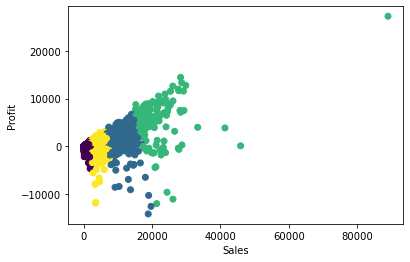

In [15]:
plt.scatter(x=Superstore_ML["Sales"], y=Superstore_ML['Profit'], c=Superstore_ML['class'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.savefig("SuperstoreScatter.png")

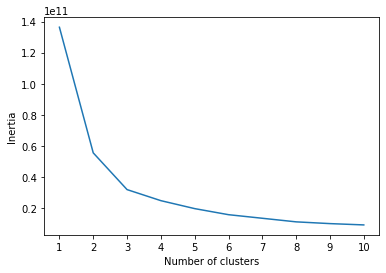

In [16]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Superstore_ML)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('Superstore_MLelbow.png')